In [1]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
class Dataset:
    
    def __init__(self):
        pass
    
    def generate(self, x):
        """
        Simple quadratic function to generate numbers from single variable
        """
        y = x**2 + 3
        # y = 2*x + 3
        return y

    def linear_transform(x, w, b):
        """
        Perform a linear transformation on the input array x using weights/slope w and bias/intercept b.
        Args:
            x: Input array of independent data.
            w: Weight vector or slope vector.
            b: Bias value or intercept.
        Returns:
            Transformed matrix.
        """
        return x @ w + b

# Linear Regression from scratch

In [3]:
class LinearRegression:
    
    def __init__(self):
        self.w = 0
        self.b = 0
        self.alpha = 0.01
        self.iterations = 10000
        
    def computeCost(self, x, y):
        
        """
        Calculate cost or squared error on the data using: (1 / (2 * m))sum((y_hat - y)^2)
        
        Parameters
        ----------
        x : array-like, sparse matrix as Training data.

        y : Target values.
        """
        
        m = len(y)
        y_hat = x @ self.w + self.b
        squared_diff = (y_hat - y)**2
        cost = (1 / (2 * m)) * sum(squared_diff)
        return cost
    
    def computeGradient(self, x, y):
        
        """
        Calculate gradients  dw = (1/m)*sum((y^ - y)*x); and db = (1/m)*sum((y^ - y))
        
        Parameters
        ----------
        x : array-like, sparse matrix as Training data.

        y : Target values.
        """
        
        m = len(y)
        # derivative w.r.t w
        y_hat = x @ self.w + self.b
        dw = (1/m) * sum((y_hat - y) @ x)
        db = (1/m) * sum(y_hat - y)
        return dw, db
    
    def fit(self, x, y, visualize=False):
        
        """
        Apply a Linear Fit on x and y using Gradient Descent algorithm.
        
        Parameters
        ----------
        x : array-like, sparse matrix as Training data.

        y : Target values.
        
        visualize : True if you need to see how the model fits on the data.

        Returns
        -------
        self : object
            Fitted Estimator.
        """
        
        self.w = np.zeros(x.shape[1])
        prev_cost = 0
        for i in range(self.iterations):
            cost = self.computeCost(x, y)
            
            if i%50 == 0 and visualize==True and np.absolute(cost - prev_cost) > 0.01:
                self.Visualize_Fit(x, y)
            
            dw, db = self.computeGradient(x, y)
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db
            if abs(cost - prev_cost) < 1e-6:
                break
            prev_cost = cost
    
    def Visualize_Fit(self, x, y):
        
        """
        Visualize process of Linear Regression by showing changes in fitted line at every step of Gradient Descent.
        
        Parameters
        ----------
        x : array-like, sparse matrix as Training data.

        y : Target values.
        """
        
        plt.xlim(min(x)-0.2, max(x)+0.2)
        plt.ylim(min(y)-2, max(y)+2)
        plt.plot(x, y, marker="o", label='Original Data')
        y_pred = self.predict(x)
        plt.plot(x, y_pred, marker="+", label='Inference Data', linestyle='--')
        plt.title('Original vs Pridicted')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.legend()
        plt.show()
        time.sleep(0.5)  # Adjust the sleep time for the desired update rate
        clear_output(wait=True)
    
    def predict(self, x):
        """
        Predicts y given input x
        """
        y_pred = x @ self.w + self.b
        return y_pred

In [4]:
data = Dataset()

# Dataset for univariate Linar Regression
x = np.linspace(0,9, 10)
y = [data.generate(i) for i in x]
x = x.reshape(-1,1)

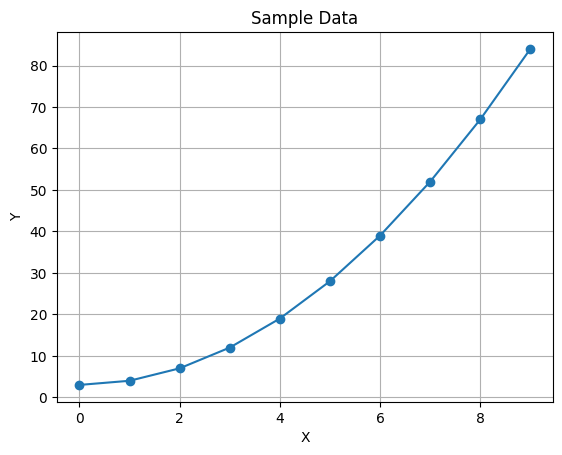

In [5]:
# Plotting Data
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

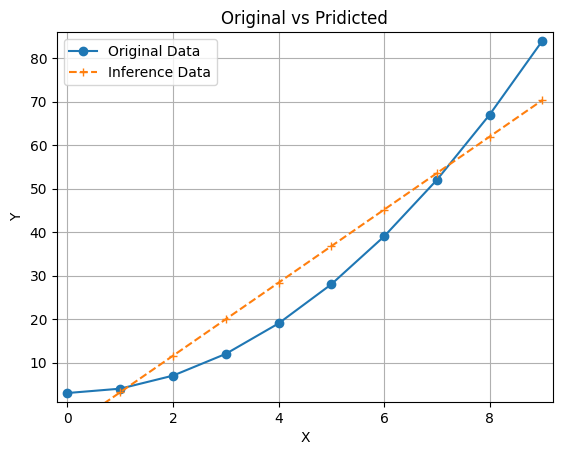

In [6]:
model = LinearRegression()

# Fitting a linear line on the Data x and y
model.fit(x, y, visualize=True)  # Change this flag to False if you don't want to visualize the fitting process.

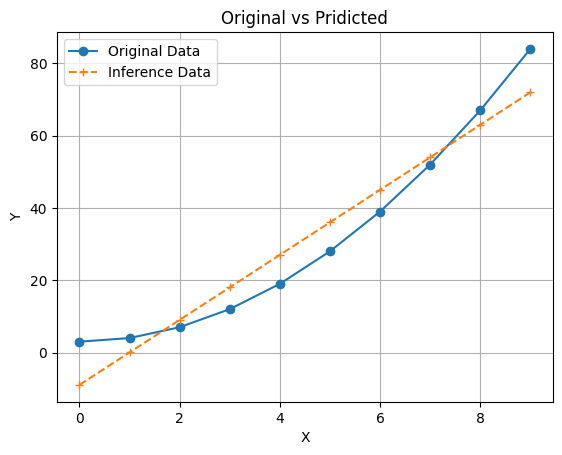

In [7]:
y_pred = model.predict(x)

plt.plot(x, y, marker="o", label='Original Data')
plt.plot(x, y_pred, marker="+", label='Inference Data', linestyle='--')
plt.title('Original vs Pridicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Comparision with sklearn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_model = LinearRegression()

lin_model.fit(x,y)

LinearRegression()

In [10]:
lin_model.coef_, lin_model.intercept_

(array([9.]), -9.000000000000007)

In [11]:
# y pred computed by sklearn
y_pred_sk = lin_model.predict(x)

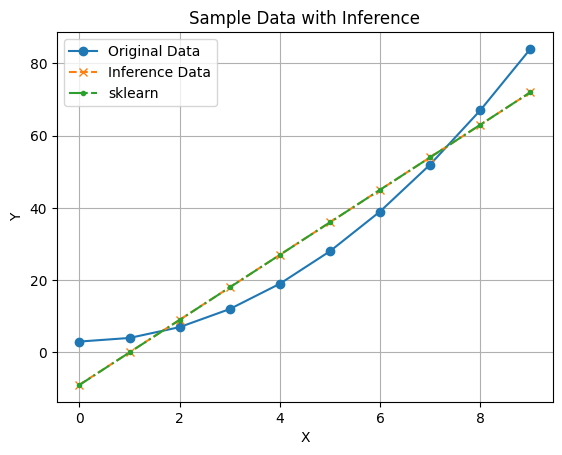

In [12]:
plt.plot(x, y, marker='o', linestyle='-', label='Original Data')  # Original data
plt.plot(x, y_pred, marker='x', linestyle='--', label='Inference Data')  # Inference data
plt.plot(x, y_pred_sk, marker='.', linestyle='-.', label='sklearn')  # Inference data
plt.title('Sample Data with Inference')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()  # Add legend to differentiate between original and inference data
plt.show()